In [2]:
## beginner !
!pip install kagglehub
import kagglehub

# Download latest version
path = kagglehub.dataset_download("mczielinski/bitcoin-historical-data")

print("Path to dataset files:", path)

100%|██████████| 97.0M/97.0M [00:27<00:00, 3.73MB/s]

Extracting files...


Path to dataset files: C:\Users\rajpr\.cache\kagglehub\datasets\mczielinski\bitcoin-historical-data\versions\380


In [3]:
import pandas as pd
df = pd.read_csv("bitcoin.csv")
df.head()

,Timestamp,Open,High,Low,Close,Volume
0,1.325412e+09,4.58,4.58,4.58,4.58,0.0
1,1.325412e+09,4.58,4.58,4.58,4.58,0.0
2,1.325412e+09,4.58,4.58,4.58,4.58,0.0
3,1.325412e+09,4.58,4.58,4.58,4.58,0.0
4,1.325412e+09,4.58,4.58,4.58,4.58,0.0


In [8]:
#convert a coloumn to datetime and set it as index 
df['Timestamp'] = pd.to_datetime(df['Timestamp'])
df.set_index('Timestamp', inplace=True)
df.head()


,Open,High,Low,Close,Volume
Timestamp,,,,,
1970-01-01 00:00:01.325412060,4.58,4.58,4.58,4.58,0.0
1970-01-01 00:00:01.325412120,4.58,4.58,4.58,4.58,0.0
1970-01-01 00:00:01.325412180,4.58,4.58,4.58,4.58,0.0
1970-01-01 00:00:01.325412240,4.58,4.58,4.58,4.58,0.0
1970-01-01 00:00:01.325412300,4.58,4.58,4.58,4.58,0.0


In [9]:
## resample daily data to monthly frequency and calculate the mean
df_monthly = df.resample('M').mean()
df_monthly.head()

,Open,High,Low,Close,Volume
Timestamp,,,,,
1970-01-31,20345.967309,20353.314487,20338.416169,20345.97512,5.164425


In [14]:
### plot a time series line graph from a dataframe ! 
import matplotlib.pyplot as plt


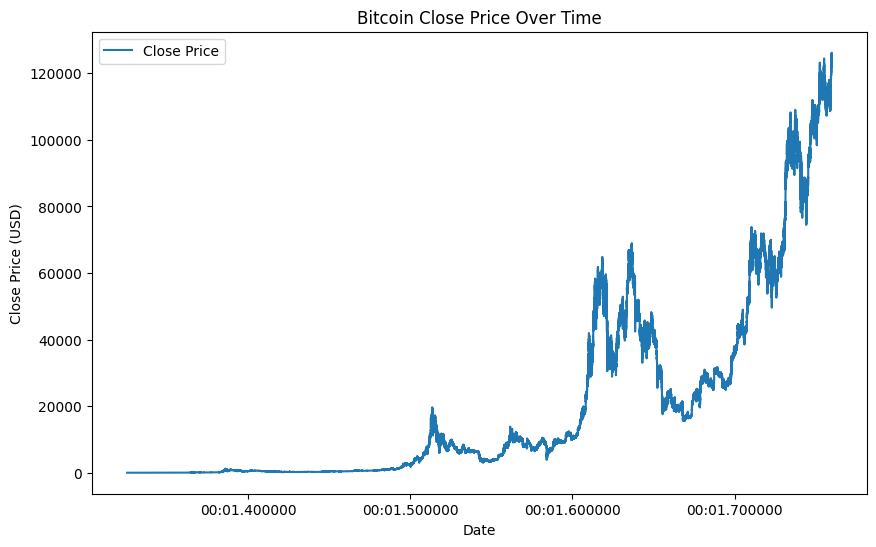

In [15]:
### plot a time series line graph from a dataframe ! 
plt.figure(figsize=(10, 6))
plt.plot(df.index, df['Close'], label='Close Price')
plt.title('Bitcoin Close Price Over Time')
plt.xlabel('Date')
plt.ylabel('Close Price (USD)')
plt.legend()
plt.show()


In [16]:
## extract year ,month ,day from a datetime coloumn !
df['Year'] = df.index.year
df['Month'] = df.index.month
df['Day'] = df.index.day
df.head()


,Open,High,Low,Close,Volume,Year,Month,Day
Timestamp,,,,,,,,
1970-01-01 00:00:01.325412060,4.58,4.58,4.58,4.58,0.0,1970,1,1
1970-01-01 00:00:01.325412120,4.58,4.58,4.58,4.58,0.0,1970,1,1
1970-01-01 00:00:01.325412180,4.58,4.58,4.58,4.58,0.0,1970,1,1
1970-01-01 00:00:01.325412240,4.58,4.58,4.58,4.58,0.0,1970,1,1
1970-01-01 00:00:01.325412300,4.58,4.58,4.58,4.58,0.0,1970,1,1


In [18]:
### forward fill and backward-fill missing time series data !
## forward fill 
df['Close'].ffill(inplace=True)
df.head()
#backward fill 
df['Close'].bfill(inplace = True)
df.head()

,Open,High,Low,Close,Volume,Year,Month,Day
Timestamp,,,,,,,,
1970-01-01 00:00:01.325412060,4.58,4.58,4.58,4.58,0.0,1970,1,1
1970-01-01 00:00:01.325412120,4.58,4.58,4.58,4.58,0.0,1970,1,1
1970-01-01 00:00:01.325412180,4.58,4.58,4.58,4.58,0.0,1970,1,1
1970-01-01 00:00:01.325412240,4.58,4.58,4.58,4.58,0.0,1970,1,1
1970-01-01 00:00:01.325412300,4.58,4.58,4.58,4.58,0.0,1970,1,1


In [ ]:
## use a rolling window (eg , 7 day moving average !) 
df['Close'].rolling(window=7).mean()